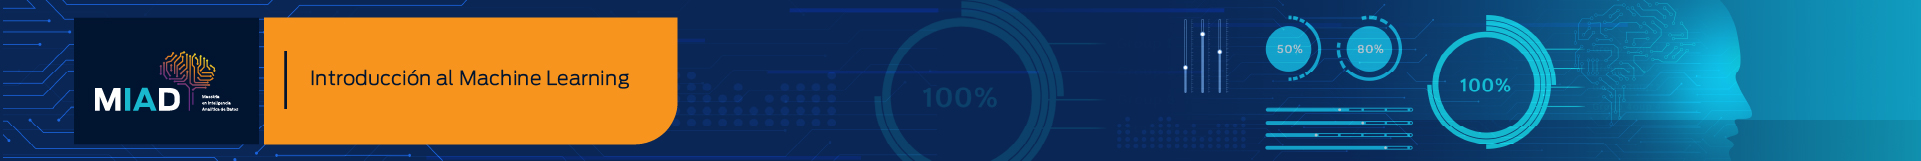

# Introducción al Machine Learning - Semana 4
## Caso: Implementación de modelos no lineales aditivos en un problema de regresión

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos no lineales aditivos y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos MARS y GAM.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:  

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación de modelos lineales: Se estiman los tres modelos lineales solicitados, se evalúan en test y se concluye correctamente qué modelo tiene mayor capacidad predictiva. [10 puntos] 

Estimación del modelo MARS: Se estima el modelo MARS correctamente [15 puntos] 

Interpretación de predictores MARS: Se interpretan al menos tres predictores en el modelo MARS y no se presentan errores en este análisis. [15 puntos] 

Estimación del modelo GAM: Se estima el modelo GAM correctamente [10 puntos] 

Interpretación de predictores GAM: Se interpretan los mismos predictores que en el modelo MARS y no presenta errores en su análisis. [10 puntos] 

Conclusión sobre la primera hipótesis: Se utiliza el procedimiento adecuado para concluir sobre la hipótesis establecida y se realiza el análisis correctamente. [10 puntos] 

Conclusión sobre la segunda hipótesis: Se utiliza el procedimiento adecuado para concluir sobre la hipótesis establecida y se realiza el análisis correctamente. [10 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos]

### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Carseats", la cual contiene 10 variables predictivas. De esta manera, el objetivo de la actividad es predecir la variable de ventas "Sales".

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-carseats


### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [1]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####

#Importación de librerías
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from pygam import GAM, s, LinearGAM, te, f, l
from pyearth import Earth
from scipy.stats import chi2
import matplotlib.pyplot as plt
import warnings

In [2]:
#Lectura de archivo fuente
df1 = pd.read_csv('./dataset-11424.csv')
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
#Dimensiones originales de dataset
df1.shape

(400, 11)

In [4]:
#Variables de dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


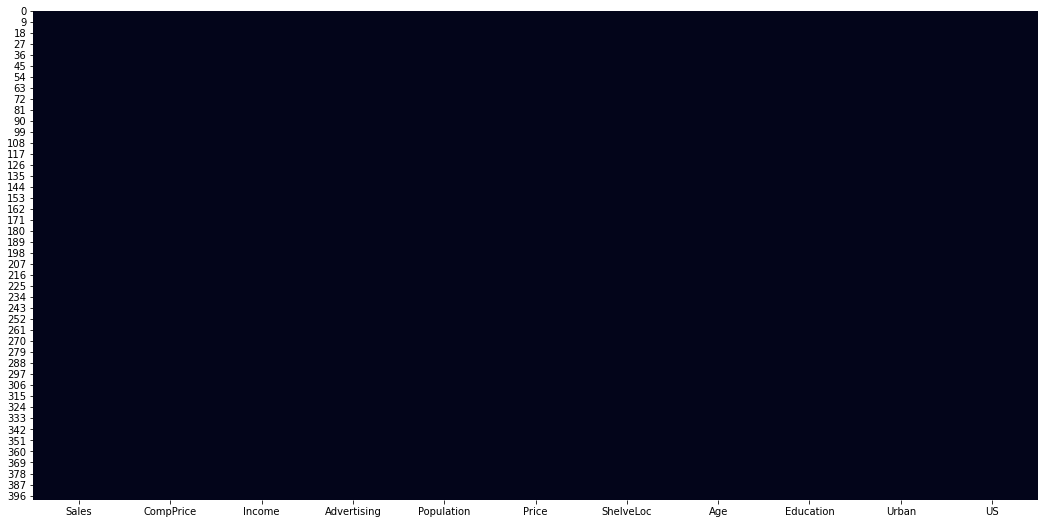

In [5]:
#Vistazo general de datos faltantes
plt.figure(figsize=(18, 9))
sns.heatmap(df1.isnull(), cbar=False)
plt.show()

In [6]:
#Estadísticas descriptivas
for i, col in enumerate(df1.columns):
    print(df1[col].describe(), '\n')

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64 

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64 

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64 

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64 

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64 

count    400.000000
mean     115.7

In [7]:
#Conversión de variables categóricas a numéricas

cat_num = {'ShelveLoc': {'Bad': 0, 'Medium': 1, 'Good': 2},
           'Urban': {'No': 0, 'Yes': 1}, 
           'US': {'No': 0, 'Yes': 1},
          }
df1 = df1.replace(cat_num)
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


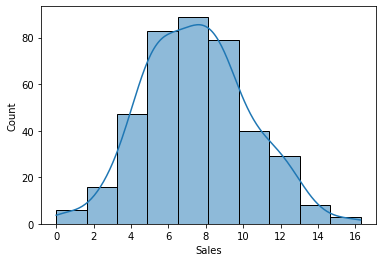

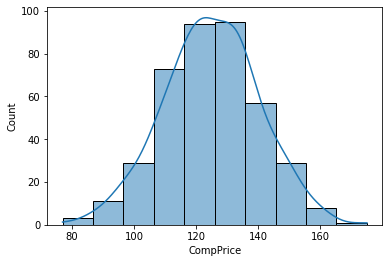

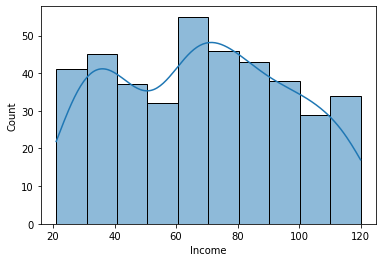

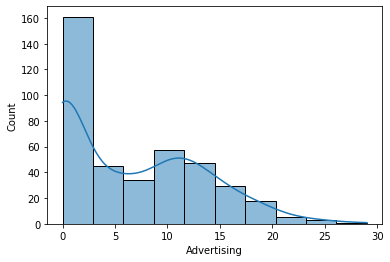

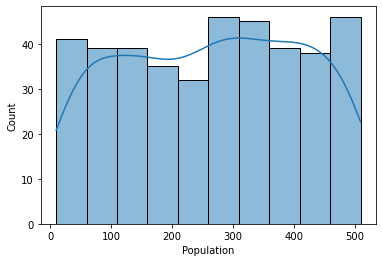

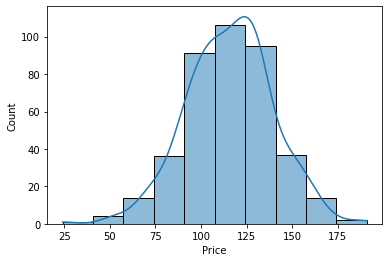

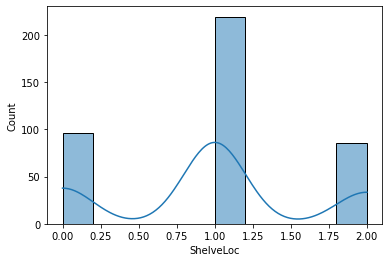

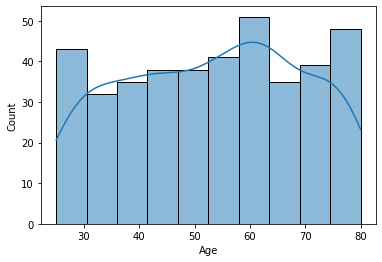

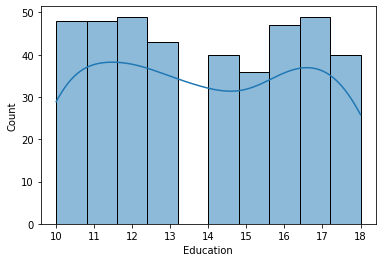

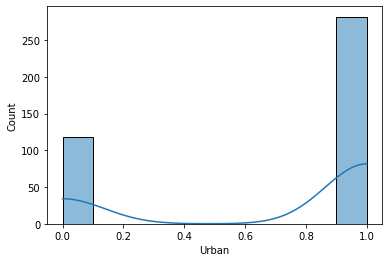

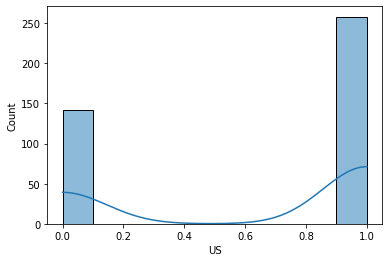

In [8]:
#Histogramas
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.histplot(df1[col], bins=10, kde=True)

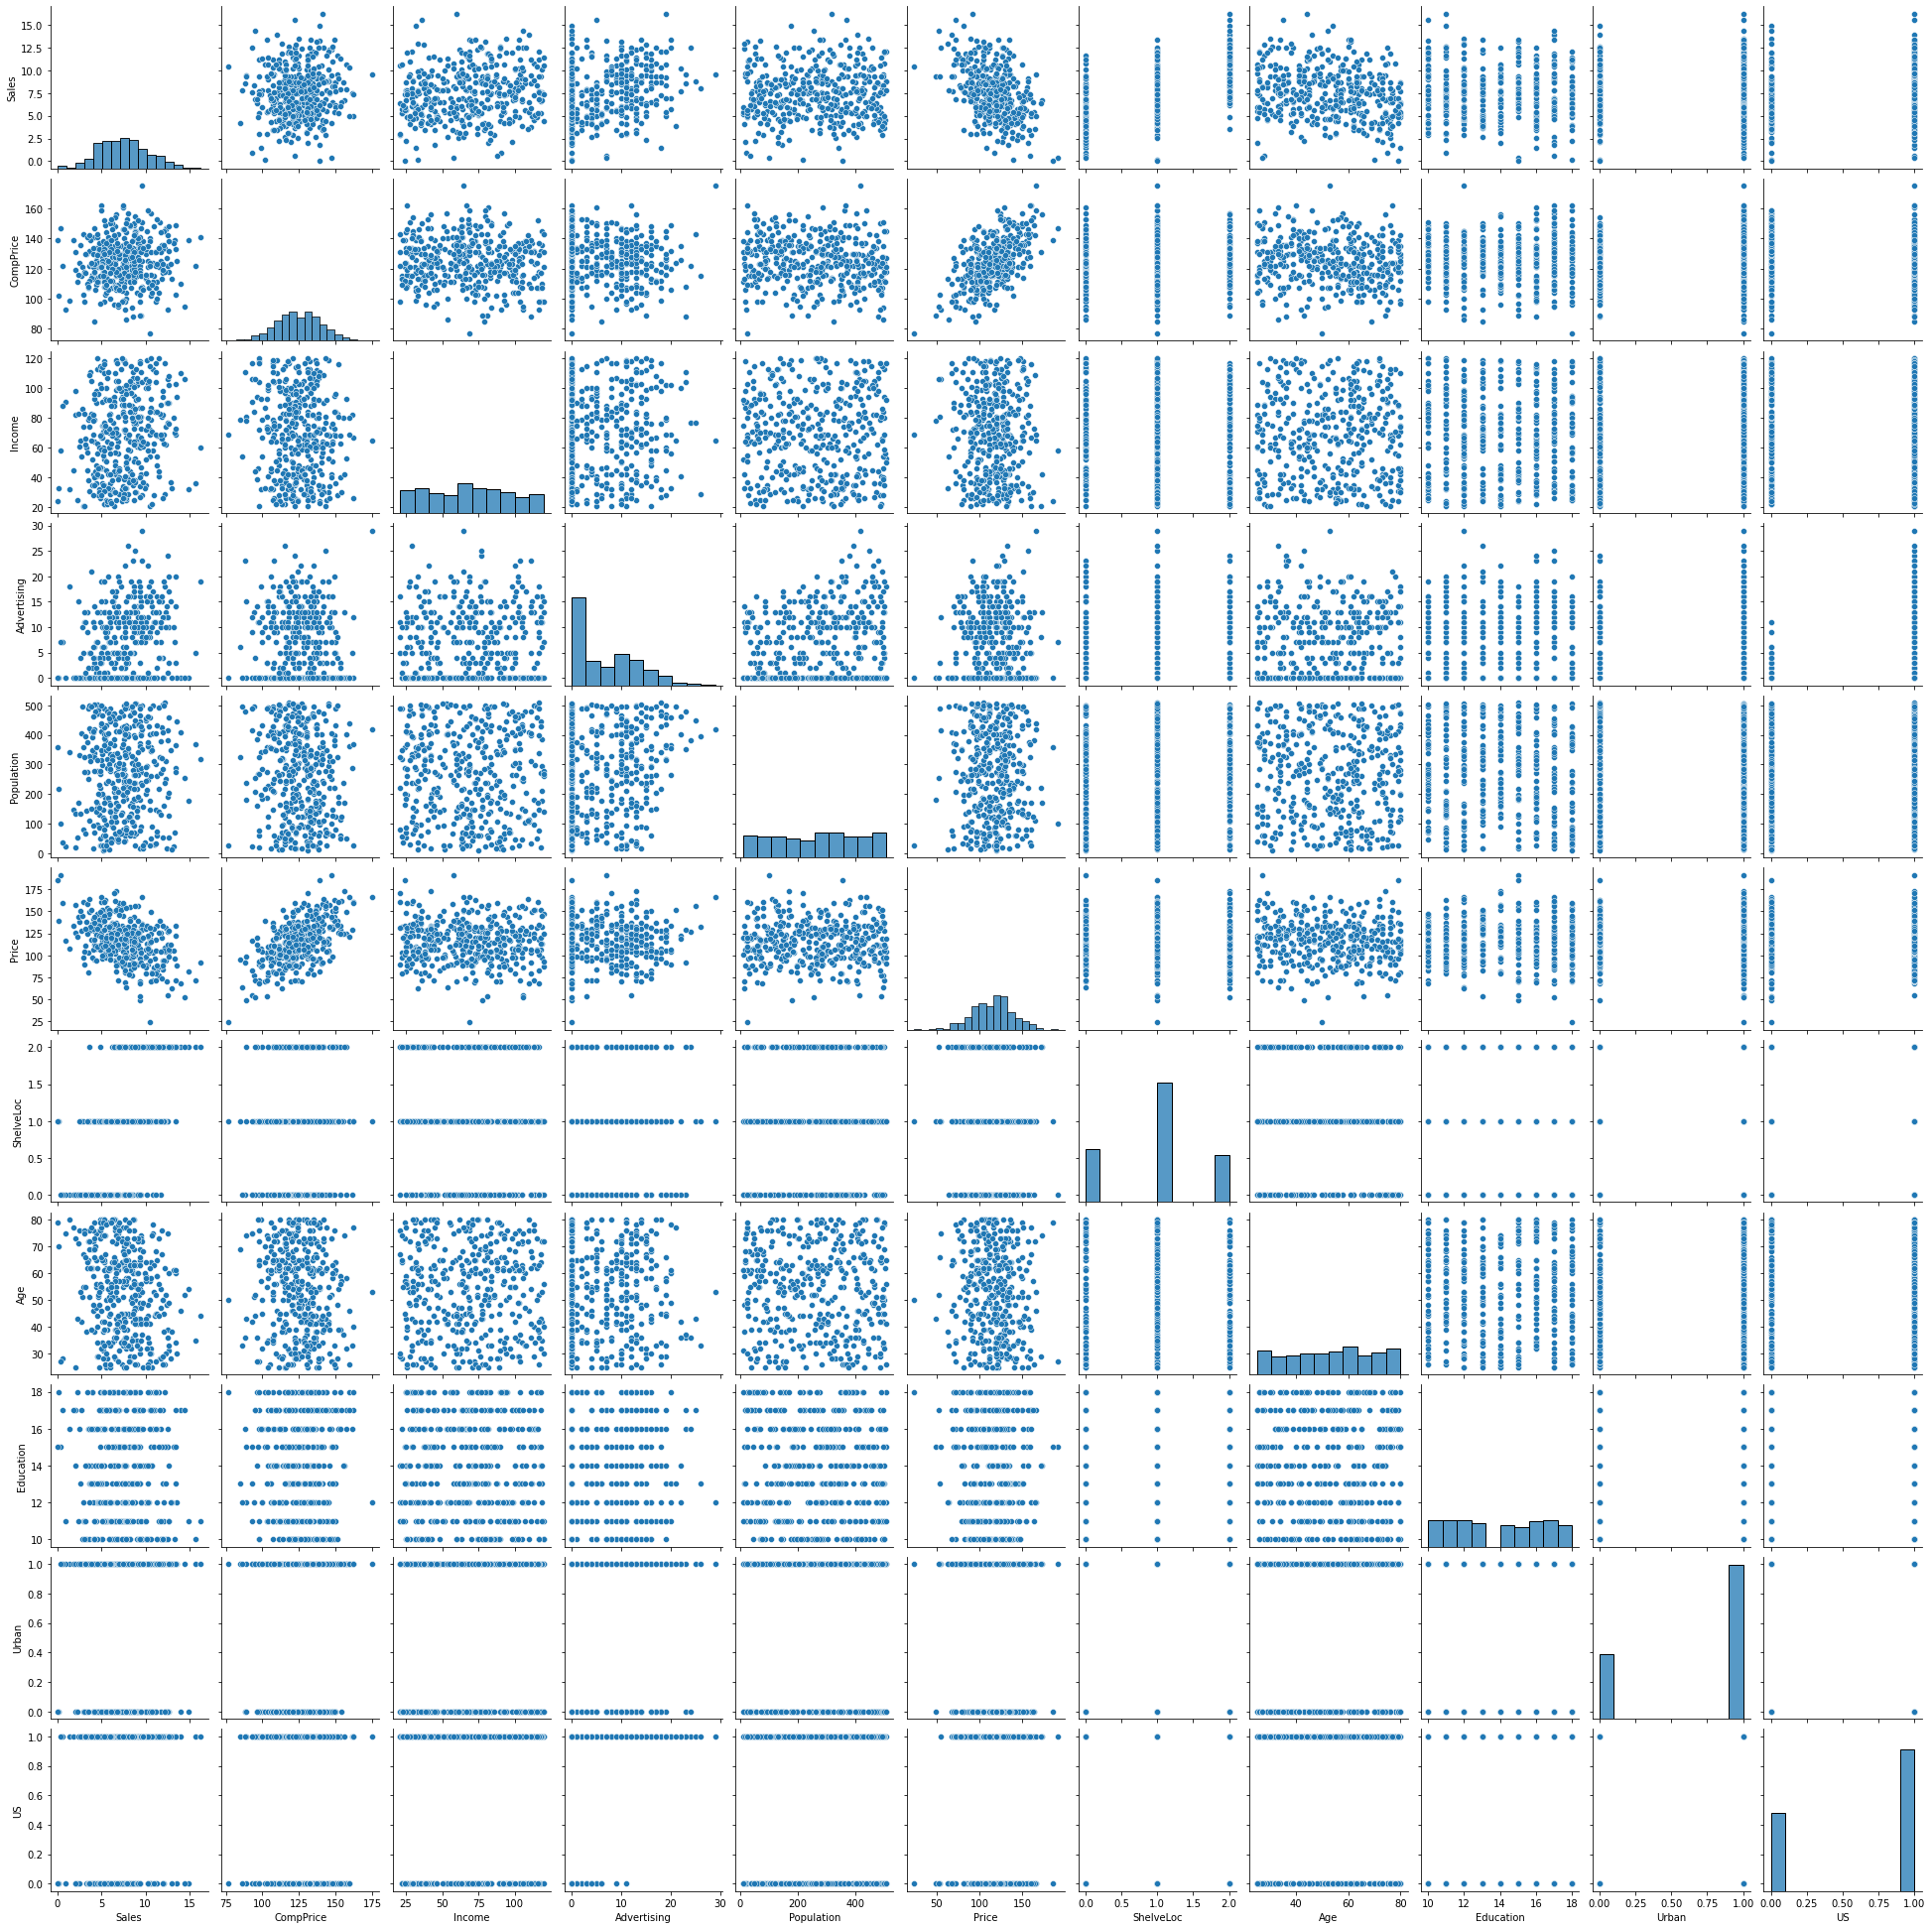

In [9]:
#Correlograma
sns.pairplot(df1, kind='scatter')
plt.show()

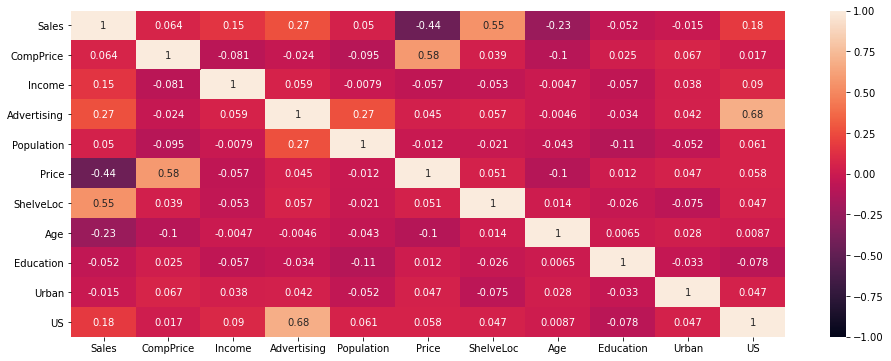

In [10]:
#Mapa de calor
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)

### Conclusiones punto 1

La base de datos proporcionada para el ejercicio posee 10 variables predictoras y una de respuesta (Sales), contiene 400 observaciones y no hay datos faltantes. De las 10 variables, 3 son categóricas: ShelveLoc, Urban y US.

Los histogramas y estadísticas nos muestran que Sales, CompPrice, Price y ShelveLoc tienden a una distribución normal, mientras que otras variables como Income, Population, Age y Education tienden a ser uniformes. Por otro lado Advertising, Urban y US son sesgadas.

El correlograma muestra que para la mayoría de los pares de variables la gráfica resultante son puntos dispersos. Hay una visible correlación entre US y Advertising (0.68), seguramente debido a que en Estados Unidos las tiendas tendrían más presupuesto para publicidad.

### 2. Estimación de modelos lineales  (10 puntos)
Encuentren el modelo lineal que mejor predice la variable "Sales" entre Lasso, PCA, PLS. Para esto, estimen los modelos usando la muestra de entrenamiento y evalúen el poder predictivo en la muestra de test. Describan su procedimiento y analicen los resultados.

In [11]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

#Carga de datos
XTotal = df1.drop(['Sales'], axis=1).to_numpy()
yTotal = df1['Sales'].to_numpy()

#Partición de datos
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

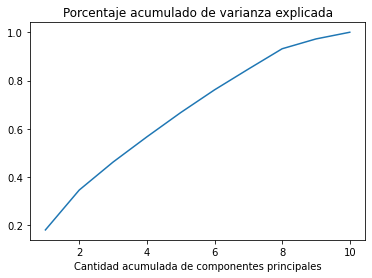

MSE regresión por componentes principales:
1.3388022051564614


In [12]:
#Estimación del modelo usando PCA
scaler = StandardScaler()
scaler.fit(XTrain)
XEscaladoTrain = scaler.transform(XTrain)

p = len(XEscaladoTrain[1, ])
pca = PCA(n_components=p).fit(XEscaladoTrain)
A = pca.components_

varianzaExplicada = pca.explained_variance_
porcentajeVarianzaExplicada = pca.explained_variance_ratio_
plt.plot(range(1, p+1), np.cumsum(porcentajeVarianzaExplicada))
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()

nComponentesElegidas = 10

ZTotalTrain = np.matmul(XEscaladoTrain, A)
ZTrain = ZTotalTrain[:, range(nComponentesElegidas)]

regPCA = LinearRegression()
regPCA.fit(ZTrain, yTrain)

XEscaladoTest = scaler.transform(XTest)

ZTotalTest = np.matmul(XEscaladoTest, A)
ZTest = ZTotalTest[:, range(nComponentesElegidas)]

prediccionPCA = regPCA.predict(ZTest)
MSEPCA = np.average(np.square(prediccionPCA-yTest))
print('MSE regresión por componentes principales:')
print(MSEPCA)

In [13]:
#Estimación del modelo usando PLS
p = len(XTrain[1, ])

pls = PLSRegression(n_components=p)
pls.fit(XTrain, yTrain)

prediccionPLS = pls.predict(XTest)

prediccionPLS = np.hstack(prediccionPLS)

MSEPLS = np.average(np.square(prediccionPLS-yTest))
print('MSE regresión por partial least squares:')
print(MSEPLS)

MSE regresión por partial least squares:
1.3388022051564608


El parámetro de penalización es:
0.041987070844439055
El valor del R^2 es:
0.8850307851571463
Los coeficientes estimados son:
[ 9.43671654e-02  1.45648319e-02  1.20755954e-01  1.42374129e-04
 -9.92666802e-02  2.28185373e+00 -4.71406202e-02 -5.18750294e-02
  0.00000000e+00 -0.00000000e+00]


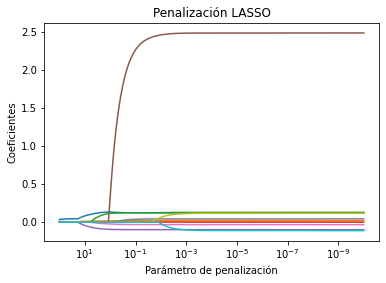

MSE regresión con penalización tipo LASSO:
1.3153286137810136


In [14]:
#Estimación del modelo con penalización tipo LASSO
warnings.filterwarnings('ignore')
n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloLASSO = LassoCV(alphas=alphasCalibrar).fit(XTrain, yTrain)

print('El parámetro de penalización es:')
print(modeloLASSO.alpha_)
print('El valor del R^2 es:')
print(modeloLASSO.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloLASSO.coef_)

coefs = []
for a in alphasCalibrar:
    lasso = Lasso(alpha=a, fit_intercept=False, max_iter=10000)
    lasso.fit(XTrain, yTrain)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización LASSO')
plt.axis('tight')
plt.show()

prediccionLASSO = modeloLASSO.predict(XTest)
MSELASSO = np.average(np.square(prediccionLASSO-yTest))
print('MSE regresión con penalización tipo LASSO:')
print(MSELASSO)

### Conclusiones punto 2

Entre los modelos lineales PCA, PLS y Lasso, el que mejor predijo a la variable "Sales" fue el modelo Lasso. Sin embargo, el MSE en los tres casos fue muy similar: 1.3388 para PCA y PLS y 1.3153 para Lasso.

Para todos los casos usamos una muestra de entrenamiento del 67% de los datos y una de prueba del 33%. En el caso de PCA se utilizaron todas las variables para obtener el menor error. El modelo Lasso hizo eliminación de las variables Urban y US, mismas que consideró no informativas para el modelo.

Por esta capacidad de eliminar variables redundantes o irrelevantes, creemos que el modelo Lasso mostró mayor capacidad predictiva respecto al resto.

### 3. Estimación del modelo MARS e interpretación de predictores (30 puntos)
3.a) Estimen un modelo MARS para predecir la variable "Sales". (15 puntos)

3.b) Interpreten el efecto de al menos 3 predictores. (15 puntos)

In [15]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

#Carga de datos
XTotal = df1.drop(['Sales'], axis=1)
yTotal = pd.DataFrame(df1['Sales'])

#XTotal.drop(['Urban', 'US', 'ShelveLoc'], axis=1, inplace=True)

#Partición de datos
index_test=np.arange(0,len(yTotal),4) #Indices para test
index_train=np.delete(np.arange(0,len(yTotal),1),index_test) #Índices para train
X_test=XTotal.loc[index_test]
Y_test=yTotal.iloc[index_test]
X_train=XTotal.loc[index_train]
Y_train=yTotal.iloc[index_train]

Earth Model
----------------------------------------
Basis Function     Pruned  Coefficient  
----------------------------------------
(Intercept)        No      7.33655      
ShelveLoc          No      2.4662       
Price              No      -0.0933163   
CompPrice          No      0.0887872    
Age                No      -0.0475668   
Advertising        Yes     None         
Income             No      0.0179586    
Education          Yes     None         
US                 Yes     None         
h(Advertising-19)  No      0.189791     
h(19-Advertising)  No      -0.0973511   
----------------------------------------
MSE: 1.0096, GCV: 1.1467, RSQ: 0.8684, GRSQ: 0.8515

MSE MARS:
1.320018667689682


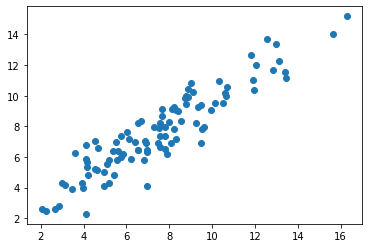

In [16]:
#Estimación de modelo usando MARS
mars_train=Earth().fit(X_train,Y_train) #Ajuste modelo MARS
print(mars_train.summary())

pred_mars=mars_train.predict(X_test) #Predicción en test
MSEMARS=np.mean((pred_mars-Y_test['Sales'].values)**2) #MSE en test
print()
print('MSE MARS:')
print(MSEMARS)

plt.plot(Y_test['Sales'].values, pred_mars, 'o')

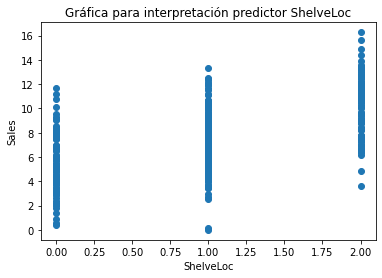

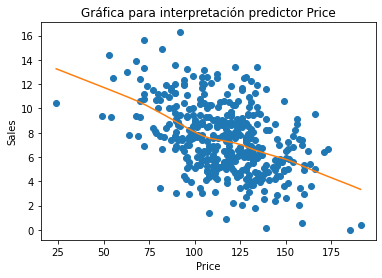

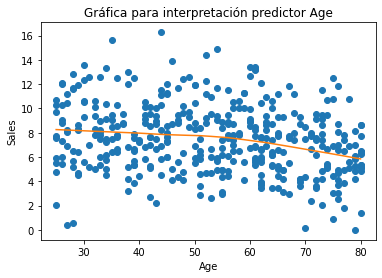

In [17]:
#Para interpretar predictores
import statsmodels.api as sm
lowess = sm.nonparametric.lowess #Funciones de suavización para visualización

#Para ShelveLoc
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('ShelveLoc')
ax.set_ylabel('Sales')
ax.set_title('Gráfica para interpretación predictor ShelveLoc')

smooth = lowess(df1['Sales'],df1['ShelveLoc'])
plt.plot(df1['ShelveLoc'], df1['Sales'], 'o') 
plt.plot(smooth[:,0],smooth[:,1])
plt.show()

#Para Price
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Price')
ax.set_ylabel('Sales')
ax.set_title('Gráfica para interpretación predictor Price')

smooth = lowess(df1['Sales'],df1['Price'])
plt.plot(df1['Price'], df1['Sales'], 'o') 
plt.plot(smooth[:,0],smooth[:,1])
plt.show()

#Para Age
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Age')
ax.set_ylabel('Sales')
ax.set_title('Gráfica para interpretación predictor Age')

smooth = lowess(df1['Sales'],df1['Age'])
plt.plot(df1['Age'], df1['Sales'], 'o') 
plt.plot(smooth[:,0],smooth[:,1])
plt.show()

### Conclusiones punto 3

*3.a) Estimen un modelo MARS para predecir la variable "Sales".*

Con el método de MARS se obtienen resultados de MSE similares a los obtenidos con Lasso, PLS y PCA, pero el mejor desempeño todavía lo mantiene Lasso.

*3.b) Interpreten el efecto de al menos 3 predictores.*

Para la interpretación de predictores decidimos analizar: ShelveLoc, Price y Age. Para el primero se observa que una mejor posición en la estantería si beneficia las ventas, lo que tiene mucho sentido. Para el segundo se observa que a un menor precio hay más ventas. Lo que significa que los clientes "ven la oportunidad". Para el último se observa que los clientes más jovenes son los que más se interesan por comprar una silla, por ejemplo los que tienen una edad entre 27-40, que es la edad más común para tener niños pequeños.

### 4. Estimación del modelo GAM e interpretación de predictores (40 puntos)
4.a) Estimen un modelo GAM para predecir la variable "Sales". (10 puntos)

4.b) Interpreten el efecto de los mismos 3 predictores que interpretaron en MARS. ¿Coinciden los
efectos? (10 puntos)

4.c) Prueben la teoría que afirma que las variables "Price" y "Population" no deben ser incluidas en el modelo. (10 puntos)

4.d) Prueben la teoría que afirma que el efecto de la variable "Income" debe ser lineal. (10 puntos)

In [18]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####

#Estimación de modelo usando GAM
gam_train=LinearGAM(terms=s(0)+s(1)+s(2)+s(3)+s(4)+l(5)+s(6)+s(7)+f(8)+f(9)).fit(X=X_train, y=Y_train)
gam_train.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     70.3398
Link Function:                     IdentityLink Log Likelihood:                                  -399.3561
Number of Samples:                          300 AIC:                                              941.3917
                                                AICc:                                             986.7286
                                                GCV:                                                1.7783
                                                Scale:                                              1.0482
                                                Pseudo R-Squared:                                   0.8954
Feature Function                  Lam

In [19]:
#Calibración del modelo para los prámetros lambda
lam = np.array([.2, 1]) #Selección de valores de lambda por variable
lams = [lam] * 10
gam_train.gridsearch(X_train, Y_train, lam=lams)
gam_train.summary()

100% (1024 of 1024) |####################| Elapsed Time: 0:01:49 Time:  0:01:49


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     65.2666
Link Function:                     IdentityLink Log Likelihood:                                  -400.3996
Number of Samples:                          300 AIC:                                              933.3324
                                                AICc:                                             971.6383
                                                GCV:                                                1.6835
                                                Scale:                                              1.0406
                                                Pseudo R-Squared:                                   0.8939
Feature Function                  Lam

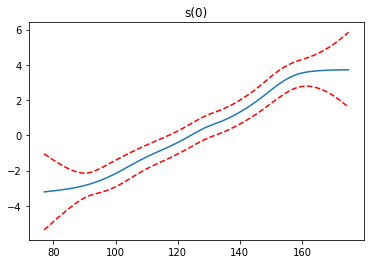

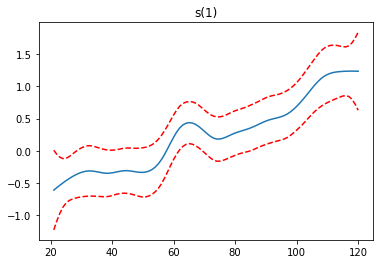

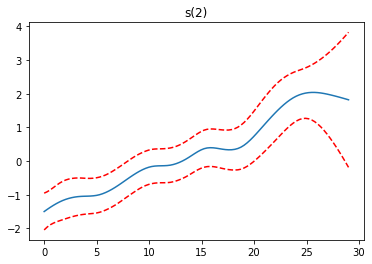

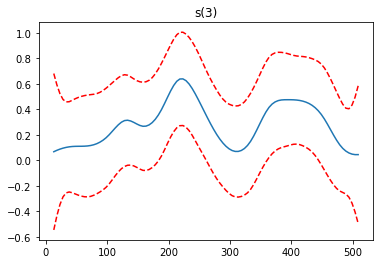

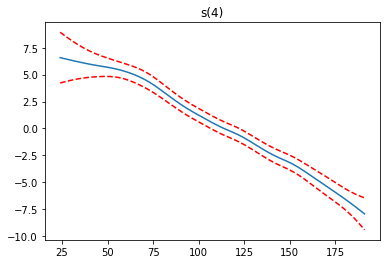

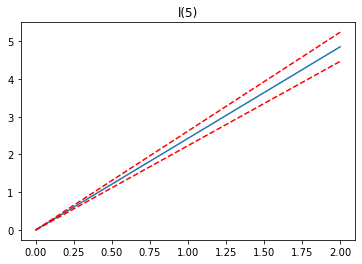

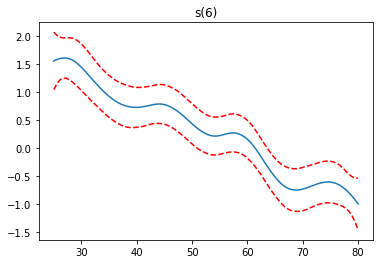

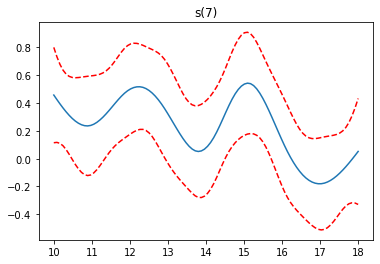

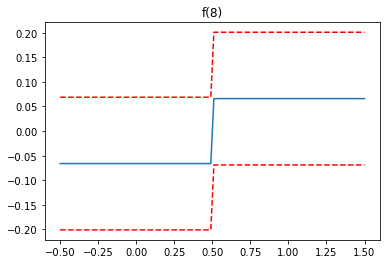

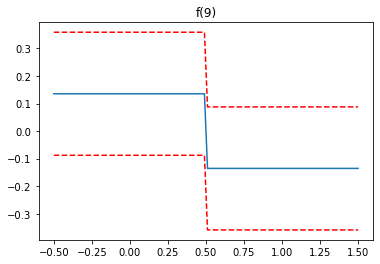

In [20]:
#Grafica de cada función e intervalos de confianza
for i, term in enumerate(gam_train.terms):
    if term.isintercept:
        continue

    XX = gam_train.generate_X_grid(term=i)
    pdep, confi = gam_train.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()

MSE GAM:
1.4440640865430057


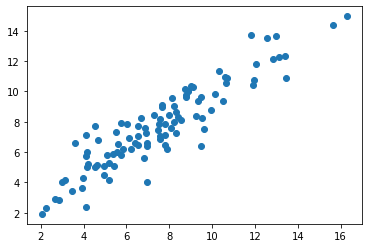

In [21]:
#Prueba de modelo GAM
pred=gam_train.predict(X=X_test) #Predicción en test
MSEGAM=np.mean((pred-Y_test['Sales'].values)**2) #MSE en test
print('MSE GAM:')
print(MSEGAM)

plt.plot(Y_test['Sales'].values, pred, 'o')

In [22]:
#Modelo gam reducido omitiendo variables Price (4) y Population (3)
gam_m0=LinearGAM(terms=s(0)+s(1)+s(2)+l(5)+s(6)+s(7)+f(8)+f(9)).fit(X=X_train, y=Y_train)
gam_m0.summary()

EP=gam_m0.statistics_['deviance']-gam_train.statistics_['deviance'] #Cálculo estdístico de prueba
df=gam_train.statistics_['edof']-gam_m0.statistics_['edof'] #Cálculo grados de libertad
pvalue=1-chi2.cdf(EP,df) #Cálculo p-valor
pvalue

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     51.8589
Link Function:                     IdentityLink Log Likelihood:                                  -737.2105
Number of Samples:                          300 AIC:                                             1580.1387
                                                AICc:                                            1603.2712
                                                GCV:                                                6.0792
                                                Scale:                                              4.2228
                                                Pseudo R-Squared:                                   0.5447
Feature Function                  Lam

0.44861170099407666

MSE GAM:
6.12803599376882


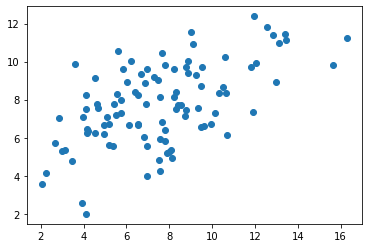

In [23]:
#Prueba de modelo GAM reducido
pred=gam_m0.predict(X=X_test) #Predicción en test
MSEGAM_M0=np.mean((pred-Y_test['Sales'].values)**2) #MSE en test
print('MSE GAM:')
print(MSEGAM_M0)

plt.plot(Y_test['Sales'].values, pred, 'o')

In [24]:
#Modelo gam modificado modelando la variable Income (1) como lineal
gam_m0=LinearGAM(terms=s(0)+l(1)+s(2)+s(3)+s(4)+l(5)+s(6)+s(7)+f(8)+f(9)).fit(X=X_train, y=Y_train)
gam_m0.summary()

EP=gam_m0.statistics_['deviance']-gam_train.statistics_['deviance'] #Cálculo estdístico de prueba
df=gam_train.statistics_['edof']-gam_m0.statistics_['edof'] #Cálculo grados de libertad
pvalue=1-chi2.cdf(EP,df) #Cálculo p-valor
pvalue

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      61.042
Link Function:                     IdentityLink Log Likelihood:                                  -404.1544
Number of Samples:                          300 AIC:                                              932.3927
                                                AICc:                                             965.4049
                                                GCV:                                                1.6358
                                                Scale:                                              1.0503
                                                Pseudo R-Squared:                                   0.8909
Feature Function                  Lam

0.40852304793184224

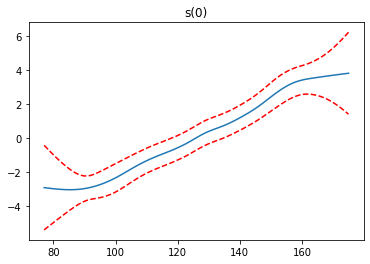

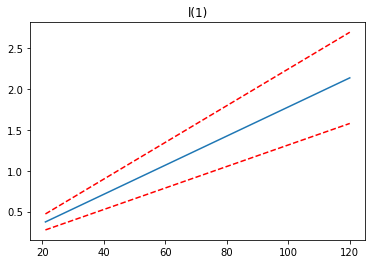

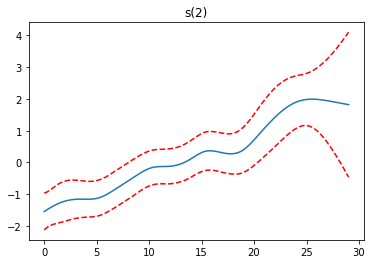

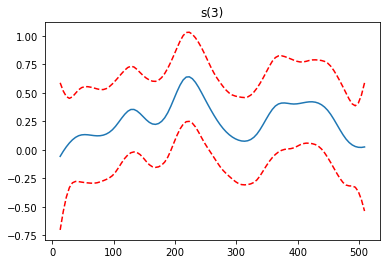

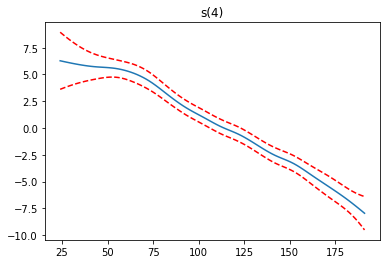

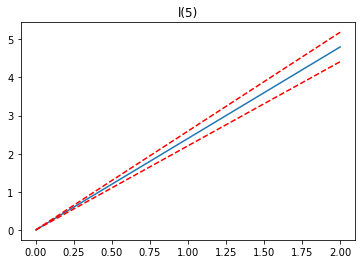

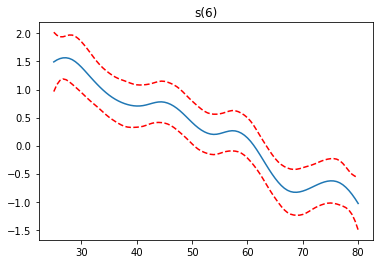

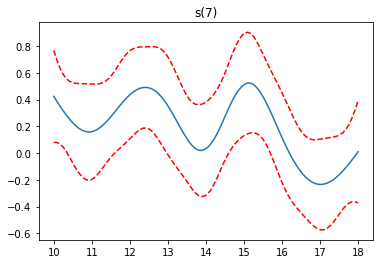

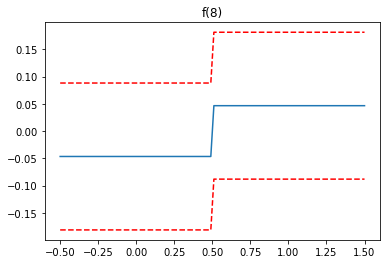

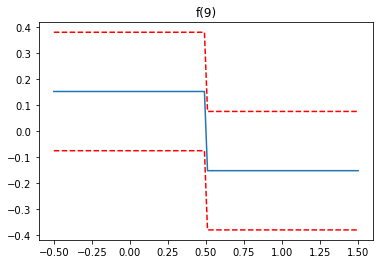

In [25]:
#Grafica de cada función e intervalos de confianza
for i, term in enumerate(gam_m0.terms):
    if term.isintercept:
        continue

    XX = gam_m0.generate_X_grid(term=i)
    pdep, confi = gam_m0.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()

MSE GAM:
1.4553678059302078


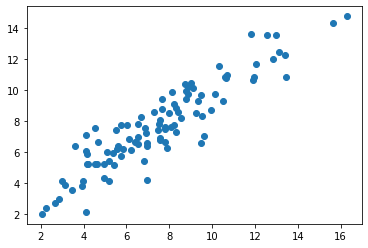

In [26]:
#Prueba de modelo GAM modificado
pred=gam_m0.predict(X=X_test) #Predicción en test
MSEGAM_M0=np.mean((pred-Y_test['Sales'].values)**2) #MSE en test
print('MSE GAM:')
print(MSEGAM_M0)

plt.plot(Y_test['Sales'].values, pred, 'o')

### Conclusiones punto 4

*4.a) Estimen un modelo GAM para predecir la variable "Sales".*

Se entrenó al modelo utilizando todas las variables, incluyendo a las categóricas, las cuales se codificaron siguiendo una estrategia de reemplazo, tal cual como se hizo en el paso 3. Todas las variables fueron modeladas como funciones spline, salvo las categóricas que se modelaron como lineales (ShelveLoc) y factores (Urban y US). La estrategia para particionar la data fue la misma que la usada en el punto anterior. Adicionalmente, se calibraron los prámetros lambda del modelo.

Graficamente los resultados del modelo para la muestra de entrenamiento nos indican que todas las funciones se pueden considerar bien calibradas de acuerdo al parámetro lambda ($\lambda$) que se observa en el summary. Por ejemplo, para las funciones de las variables ShelveLoc, Urban y US, el gráfico resultante para el primer caso tiene un claro comportamiento lineal, para los últimos dos describe un comportamiento típico de un factor.

*4.b) Interpreten el efecto de los mismos 3 predictores que interpretaron en MARS. ¿Coinciden los
efectos?*

Bajo las consideraciones explicadas en el punto 4.a, las variables Price (4), ShelvLoc (5) y Age (6) son significativas para el modelo, al igual que se concluyó en el punto 3.b. Con base en los grados de libertad de cada una de las funciones, vemos que la primera y la tercera son más flexibles que la segunda, lo cual tiene sentido, ya que la función de la variable ShelvLoc se modeló como lineal.

*4.c) Prueben la teoría que afirma que las variables "Price" y "Population" no deben ser incluidas en el modelo.*

Se probó la hipotesis (H0) que afirma que las variables Price y Population se deben excluir del modelo. Nuestra hipotesis alternativa (H1) es nuestro modelo original (punto 4.a). Se siguió el debido proceso de cálculo de estadístico de prueba y grados de libertad, obteniendo un p-value de 0.4486, lo que confirma que no hay suficiente evidencia para rechazar H0.

*4.d) Prueben la teoría que afirma que el efecto de la variable "Income" debe ser lineal.*

Se probó la hipotesis (H0) que afirma que la variable Income debe ser lineal. Nuestra hipotesis alternativa (H1) es nuestro modelo original (punto 4.a). Se siguió el debido proceso de cálculo de estadístico de prueba y grados de libertad, obteniendo un p-value de 0.4085, lo que confirma que no hay suficiente evidencia para rechazar H0.

### 5. Concluir sobre la capacidad predictiva de los modelos (10 puntos)
¿Cuál modelo de los estimados en los apartados 2, 3.a y 4.a resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

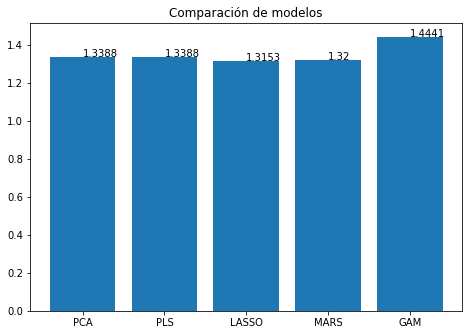

In [27]:
#Generación de gráfica comparativa de modelos
MSEPCA = round(MSEPCA, 4)
MSEPLS = round(MSEPLS, 4)
MSELASSO = round(MSELASSO, 4)
MSEMARS = round(MSEMARS, 4)
MSEGAM = round(MSEGAM, 4)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Comparación de modelos')
ejeX = ['PCA', 'PLS', 'LASSO', 'MARS', 'GAM']
ejeY = [MSEPCA, MSEPLS, MSELASSO, MSEMARS, MSEGAM]
ax.bar(ejeX, ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], y[i])
addlabels(ejeX, ejeY, plt)
plt.show()

### Conclusiones punto 5

Al comparar los MSE de los diferentes modelos se puede concluir que el modelo Lasso es el que posee mejor capacidad predictiva para los datos de entrenamiento y prueba usados. Consideramos que este modelo lineal presenta mejor desempeño (por muy poco) que los modelos no lineales (MARS y GAM) debido a que los datos se pueden modelar muy bien a través de un modelo lineal, es decir, no hay aparente necesidad de pensar en un modelo más flexible. Por otro lado la cantidad de observaciones es relativamente pequeña, lo que también incide en que un modelo lineal produzca un mejor ajuste.